In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import timeit
import numpy as np, matplotlib.pyplot as plt

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\cotengra\hyperoptimizers\hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


# Built-in function qu.groundenergy(ham)


First let's check the runtimes of finding the exact ground energy using sparse array algebra

Let's start with 1D heisenberg model

In [2]:
#True value:
qu.heisenberg_energy(10)/10

-0.4516244912364189

In [3]:
%%time
qu.groundenergy(qu.ham_heis(10, sparse=True))/10

CPU times: total: 0 ns
Wall time: 39.7 ms


-0.4258035207282876

In [4]:
%%time
qu.groundenergy(qu.ham_heis(20, sparse=True))/20

CPU times: total: 42 s
Wall time: 10.4 s


-0.4341236667199483

Let's focus on the run time for different values of _n_

In [5]:
def time1Dexact(n,runtime=10):
    testT = timeit.default_timer()
    e = qu.groundenergy(qu.ham_heis(n, sparse=True))
    testT = timeit.default_timer() - testT
    reps = int(runtime/testT)
    print(f'For n = {n}, test time  is {testT:.3f}s, running {reps} reps')
    if reps==0:
        return testT,e/n
    start = timeit.default_timer()
    for i in range(reps):
        e = qu.groundenergy(qu.ham_heis(n, sparse=True))
    t = timeit.default_timer() - start
    if reps<=2:
        t += testT
        reps +=1
    return t/reps,e/n

In [55]:
nmax = 23
ns = range(2,nmax)
ts1D = np.empty(len(ns))
es1D = np.empty(len(ns))
for i in range(len(ns)):
    t,e = time1Dexact(ns[i],1)
    ts1D[i] = t
    es1D[i] = e

For n = 2, test time  is 0.002s, running 505 reps
For n = 3, test time  is 0.002s, running 514 reps
For n = 4, test time  is 0.003s, running 379 reps
For n = 5, test time  is 0.006s, running 170 reps
For n = 6, test time  is 0.008s, running 124 reps
For n = 7, test time  is 0.017s, running 59 reps
For n = 8, test time  is 0.021s, running 48 reps
For n = 9, test time  is 0.061s, running 16 reps
For n = 10, test time  is 0.033s, running 30 reps
For n = 11, test time  is 0.045s, running 22 reps
For n = 12, test time  is 0.042s, running 23 reps
For n = 13, test time  is 0.034s, running 29 reps
For n = 14, test time  is 0.068s, running 14 reps
For n = 15, test time  is 0.128s, running 7 reps
For n = 16, test time  is 0.330s, running 3 reps
For n = 17, test time  is 0.796s, running 1 reps
For n = 18, test time  is 1.721s, running 0 reps
For n = 19, test time  is 4.716s, running 0 reps
For n = 20, test time  is 10.459s, running 0 reps
For n = 21, test time  is 21.955s, running 0 reps
For n = 

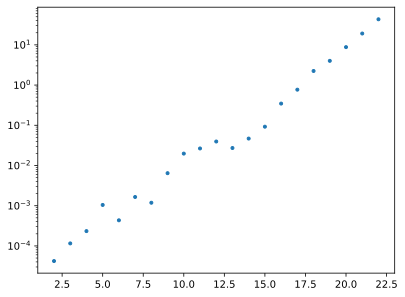

In [7]:
plt.yscale('log')
plt.plot(ns,ts1D,'.')
plt.show()

Just for fun we can look at the energies:

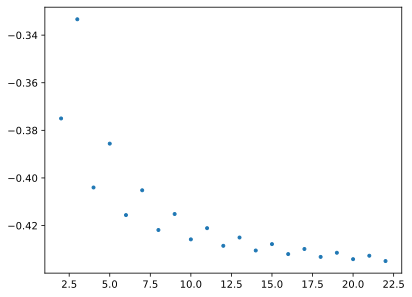

In [8]:
plt.plot(ns,es1D,'.')
plt.show()

And now let's consider 2D heisenberg model

In [9]:
def time2Dexact(nx,ny,runtime=10):
    if nx*ny>20:
        print('error: you peps is too big. pc might crash.')
        return -1, 0
    testT = timeit.default_timer()
    e = qu.groundenergy(qu.ham_heis_2D(nx, ny, sparse=True))
    testT = timeit.default_timer() - testT
    reps = int(runtime/testT)
    print(f'For ({nx} x {ny}), test time  is {testT:.3f}s, running {reps} reps')
    if reps==0:
        return testT,e/(nx*ny)
    start = timeit.default_timer()
    for i in range(reps):
        e = qu.groundenergy(qu.ham_heis_2D(nx, ny, sparse=True))
    t = timeit.default_timer() - start
    if reps<=2:
        t += testT
        reps +=1
    return t/reps,e/(nx*ny)

First check how a 1 by _n_ cell compares to 1D hamiltonian:

In [10]:
n2dTab1 = [[1,n+2] for n in range(19)]
ts2D1 = np.empty(len(n2dTab1))
es2D1 = np.empty(len(n2dTab1))
for i in range(len(n2dTab1)):
    t,e = time2Dexact(n2dTab1[i][0],n2dTab1[i][1],1)
    ts2D1[i] = t
    es2D1[i] = e

For (1 x 2), test time  is 0.002s, running 639 reps
For (1 x 3), test time  is 0.002s, running 429 reps
For (1 x 4), test time  is 0.004s, running 222 reps
For (1 x 5), test time  is 0.008s, running 127 reps
For (1 x 6), test time  is 0.008s, running 123 reps
For (1 x 7), test time  is 0.008s, running 122 reps
For (1 x 8), test time  is 0.011s, running 95 reps
For (1 x 9), test time  is 0.020s, running 50 reps
For (1 x 10), test time  is 0.042s, running 23 reps
For (1 x 11), test time  is 0.044s, running 22 reps
For (1 x 12), test time  is 0.065s, running 15 reps
For (1 x 13), test time  is 0.067s, running 15 reps
For (1 x 14), test time  is 0.132s, running 7 reps
For (1 x 15), test time  is 0.250s, running 3 reps
For (1 x 16), test time  is 0.591s, running 1 reps
For (1 x 17), test time  is 1.273s, running 0 reps
For (1 x 18), test time  is 2.954s, running 0 reps
For (1 x 19), test time  is 6.101s, running 0 reps
For (1 x 20), test time  is 13.655s, running 0 reps


As we can see below, the two implementations match in speed and results.

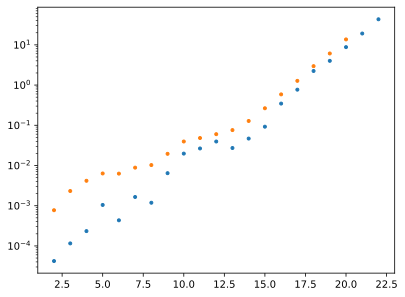

In [11]:
plt.yscale('log')
plt.plot(ns,ts1D,'.')
plt.plot([nn[0]*nn[1] for nn in n2dTab1],ts2D1,'.')
plt.show()

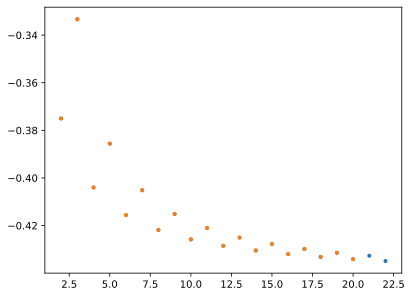

In [12]:
plt.plot(ns,es1D,'.')
plt.plot([nn[0]*nn[1] for nn in n2dTab1],es2D1,'.')
plt.show()

However, it is more interesting to look at cells with _nx_>1:

In [13]:
n2dTab = [
    [2,2],
    [2,3],
    [2,4],
    [2,5],
    [2,6],
    [2,8],
    [2,10],

    [3,3],
    [3,4],
    [3,5],
    [3,6],

    [4,4],
    [4,5]
]
ts2D = np.empty(len(n2dTab))
es2D = np.empty(len(n2dTab))
for i in range(len(n2dTab)):
    t,e = time2Dexact(n2dTab[i][0],n2dTab[i][1],1)
    ts2D[i] = t
    es2D[i] = e

For (2 x 2), test time  is 0.009s, running 113 reps
For (2 x 3), test time  is 0.010s, running 101 reps
For (2 x 4), test time  is 0.021s, running 47 reps
For (2 x 5), test time  is 0.050s, running 20 reps
For (2 x 6), test time  is 0.064s, running 15 reps
For (2 x 8), test time  is 0.861s, running 1 reps
For (2 x 10), test time  is 18.519s, running 0 reps
For (3 x 3), test time  is 0.026s, running 38 reps
For (3 x 4), test time  is 0.068s, running 14 reps
For (3 x 5), test time  is 0.344s, running 2 reps
For (3 x 6), test time  is 4.590s, running 0 reps
For (4 x 4), test time  is 0.904s, running 1 reps
For (4 x 5), test time  is 20.795s, running 0 reps


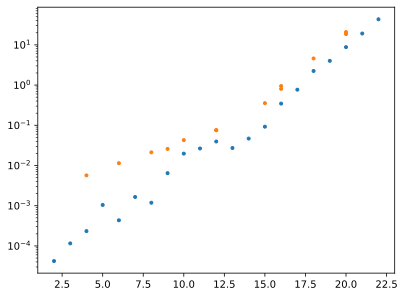

In [14]:
plt.yscale('log')
plt.plot(ns,ts1D,'.')
plt.plot([nn[0]*nn[1] for nn in n2dTab],ts2D,'.')
plt.show()

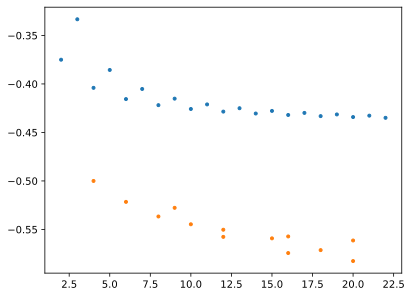

In [15]:
plt.plot(ns,es1D,'.')
plt.plot([nn[0]*nn[1] for nn in n2dTab],es2D,'.')
plt.show()

# MPS and PEPS algorithms

Now let's compare 1D and 2D algorithms that approximate the ground energy.

1D - MPS - DMRG2

In [38]:
qu.heisenberg_energy(200)/200

-0.4431677940770792

One can consult https://itensor.org/docs.cgi?page=tutorials/dmrg_params for choice of parameters

In [82]:
%%time
length = 20
accPerSite = 1e-6
#periodic BC
H = qtn.MPO_ham_heis(length, cyclic=False)
dmrg = qtn.DMRG2(H)
dmrg.solve(verbosity=1, bond_dims=(10,20,80,200,200),max_sweeps=5,cutoffs=1e-12,tol=1e-9)

1, R, max_bond=(8/10), cutoff:1e-12


100%|###########################################| 19/19 [00:00<00:00, 85.16it/s]

Energy: -8.673730453457235 ... not converged.
2, R, max_bond=(10/20), cutoff:1e-12



100%|##########################################| 19/19 [00:00<00:00, 220.12it/s]

Energy: -8.682464145028058 ... not converged.
3, R, max_bond=(20/80), cutoff:1e-12



100%|##########################################| 19/19 [00:00<00:00, 168.18it/s]

Energy: -8.682473331785918 ... not converged.
4, R, max_bond=(40/200), cutoff:1e-12



100%|###########################################| 19/19 [00:00<00:00, 94.77it/s]

Energy: -8.68247333436173 ... not converged.
5, R, max_bond=(51/200), cutoff:1e-12



100%|###########################################| 19/19 [00:00<00:00, 98.05it/s]

Energy: -8.682473334363156 ... converged!
CPU times: total: 62.5 ms
Wall time: 901 ms


True

In [73]:
def time1D_DMRG2(n,runtime=10):
    if n<5: 
        print('error: too small n')
        return -1,0
    
    H = qtn.MPO_ham_heis(n, cyclic=False)
    def heisDMRG():
        dmrg = qtn.DMRG2(H)
        dmrg.solve(verbosity=0, bond_dims=(10,20,80,200,200),max_sweeps=5,cutoffs=1e-12,tol=1e-9)
        return dmrg.energy
    testT = timeit.default_timer()
    e = heisDMRG()
    testT = timeit.default_timer() - testT
    reps = int(runtime/testT)
    print(f'For n = {n}, test time  is {testT:.3f}s, running {reps} reps')
    if reps==0:
        return testT,e/n
    start = timeit.default_timer()
    for i in range(reps):
        e = heisDMRG()
    t = timeit.default_timer() - start
    if reps<=2:
        t += testT
        reps +=1
    return t/reps,e/n

In [57]:
nmax = 100
nsDMRG = range(5,nmax)
ts1D_DMRG = np.empty(len(nsDMRG))
es1D_DMRG = np.empty(len(nsDMRG))
for i in range(len(nsDMRG)):
    t,e = time1D_DMRG2(nsDMRG[i],1)
    ts1D_DMRG[i] = t
    es1D_DMRG[i] = e

For n = 5, test time  is 0.033s, running 29 reps
For n = 6, test time  is 0.019s, running 53 reps
For n = 7, test time  is 0.029s, running 34 reps
For n = 8, test time  is 0.047s, running 21 reps
For n = 9, test time  is 0.064s, running 15 reps
For n = 10, test time  is 0.104s, running 9 reps
For n = 11, test time  is 0.115s, running 8 reps
For n = 12, test time  is 0.128s, running 7 reps
For n = 13, test time  is 0.149s, running 6 reps
For n = 14, test time  is 0.186s, running 5 reps
For n = 15, test time  is 0.205s, running 4 reps
For n = 16, test time  is 0.240s, running 4 reps
For n = 17, test time  is 0.339s, running 2 reps
For n = 18, test time  is 0.278s, running 3 reps
For n = 19, test time  is 0.453s, running 2 reps
For n = 20, test time  is 0.476s, running 2 reps
For n = 21, test time  is 0.527s, running 1 reps
For n = 22, test time  is 0.613s, running 1 reps
For n = 23, test time  is 0.754s, running 1 reps
For n = 24, test time  is 0.779s, running 1 reps
For n = 25, test tim

In [70]:
np.savetxt('1D_DMRG.cvs',np.transpose([nsDMRG,ts1D_DMRG, es1D_DMRG]))

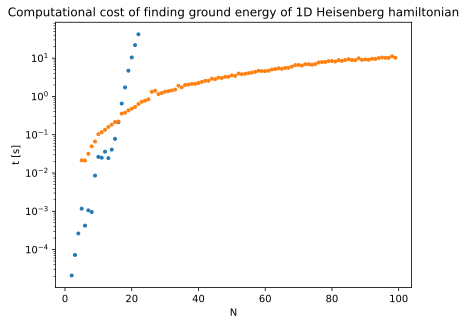

In [71]:
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('N')
plt.ylabel('t [s]')
plt.title('Computational cost of finding ground energy of 1D Heisenberg hamiltonian')
plt.plot(ns,ts1D,'.',label='exact')
plt.plot(nsDMRG,ts1D_DMRG,'.',label='DMRG')
plt.show()

And we see how DMRG can help with computational complexity, as it scales polynomially with N rather than exponentially.

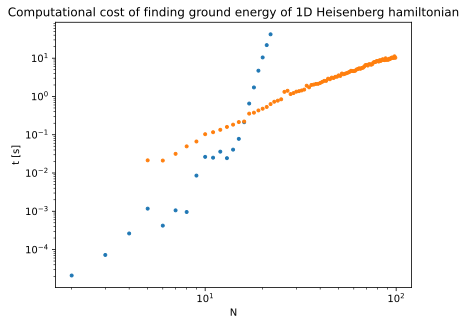

In [74]:
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('t [s]')
plt.title('Computational cost of finding ground energy of 1D Heisenberg hamiltonian')
plt.plot(ns,ts1D,'.',label='exact')
plt.plot(nsDMRG,ts1D_DMRG,'.',label='DMRG')
plt.show()

And we can see the energies obtained in DMRG are very close to those with exact 1D method. Thus, using large N with DMRG is better than exact on small N.

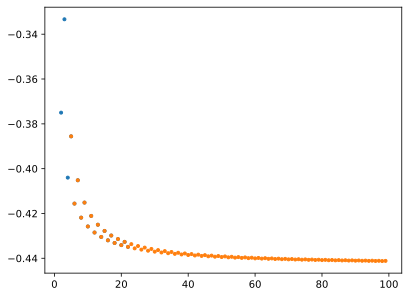

In [67]:
plt.plot(ns,es1D,'.')
plt.plot(nsDMRG,es1D_DMRG,'.')
plt.show()

Now let's move to two dimensions with Projected Entangled Pair States (PEPS)

Using the example from quimb documentation:

In [98]:
Lx,Ly = 3,3
ham = qtn.LocalHam2D(Lx, Ly, H2=qu.ham_heis(2))
D = 4
psi0 = qtn.PEPS.rand(Lx, Ly, bond_dim=D, seed=2137)
su = qtn.SimpleUpdate(
    psi0, 
    ham,
    chi=32,  # boundary contraction bond dim for computing energy
    compute_energy_every=10,
    compute_energy_per_site=True,
    keep_best=True,
)
for tau in [0.3, 0.1, 0.03]:
    su.evolve(100, tau=tau)

n=300, tau=0.0300, energy~-0.525603: 100%|##########| 100/100 [00:04<00:00, 23.50it/s]


In [100]:
su.energy

-0.5256030714052239

In [101]:
def time2DSimple(nx,ny,runtime=10):
    if nx*ny>20:
        print('error: you peps is too big. pc might crash(?)')
        return -1, 0
    

    ham = qtn.LocalHam2D(nx, ny, H2=qu.ham_heis(2))
    D = 4
    def heisSimple():
        psi0 = qtn.PEPS.rand(nx, ny, bond_dim=D, seed=2137)
        su = qtn.SimpleUpdate(
        psi0, 
        ham,
        chi=32,  # boundary contraction bond dim for computing energy
        compute_energy_every=10,
        compute_energy_per_site=True,
        keep_best=True,
        )   
        for tau in [0.3, 0.1, 0.03]:
            su.evolve(100, tau=tau)
        return su.energy

    testT = timeit.default_timer()
    e = heisSimple()
    testT = timeit.default_timer() - testT
    reps = int(runtime/testT)
    print(f'For ({nx} x {ny}), test time  is {testT:.3f}s, running {reps} reps')
    if reps==0:
        return testT,e/(nx*ny)
    start = timeit.default_timer()
    for i in range(reps):
        e = heisSimple()
    t = timeit.default_timer() - start
    if reps<=2:
        t += testT
        reps +=1
    return t/reps,e/(nx*ny)

In [102]:
ttt, eee = time2DSimple(3,3,1)

n=300, tau=0.0300, energy~-0.525604: 100%|##########| 100/100 [00:04<00:00, 22.93it/s]

For (3 x 3), test time  is 13.781s, running 0 reps


In [104]:
n2dTabSimple = [
    [2,2],
    [2,3],
    [2,4],
    [2,5],
    [2,6],
    [2,8],
    [2,10],

    [3,3],
    [3,4],
    [3,5],
    #[3,6],

    [4,4],
    #[4,5] too big
]
ts2Dsimple = np.empty(len(n2dTabSimple))
es2Dsimple = np.empty(len(n2dTabSimple))
for i in range(len(n2dTabSimple)):
    t,e = time2DSimple(n2dTabSimple[i][0],n2dTabSimple[i][1],1)
    ts2Dsimple[i] = t
    es2Dsimple[i] = e

n=300, tau=0.0300, energy~-0.494104: 100%|##########| 100/100 [00:00<00:00, 203.51it/s]


For (2 x 2), test time  is 1.567s, running 0 reps


n=300, tau=0.0300, energy~-0.518148: 100%|##########| 100/100 [00:00<00:00, 123.37it/s]


For (2 x 3), test time  is 2.692s, running 0 reps


n=300, tau=0.0300, energy~-0.529883: 100%|##########| 100/100 [00:02<00:00, 39.75it/s]


For (2 x 4), test time  is 5.316s, running 0 reps


n=300, tau=0.0300, energy~-0.513705: 100%|##########| 100/100 [00:01<00:00, 66.80it/s]


For (2 x 5), test time  is 5.082s, running 0 reps


n=300, tau=0.0300, energy~-0.540840: 100%|##########| 100/100 [00:01<00:00, 53.34it/s]


For (2 x 6), test time  is 5.847s, running 0 reps


n=300, tau=0.0300, energy~-0.547137: 100%|##########| 100/100 [00:02<00:00, 39.25it/s]


For (2 x 8), test time  is 7.962s, running 0 reps


n=300, tau=0.0300, energy~-0.551067: 100%|##########| 100/100 [00:03<00:00, 27.18it/s]


For (2 x 10), test time  is 10.503s, running 0 reps


n=300, tau=0.0300, energy~-0.525600: 100%|##########| 100/100 [00:04<00:00, 20.64it/s]


For (3 x 3), test time  is 14.263s, running 0 reps


n=300, tau=0.0300, energy~-0.531918: 100%|##########| 100/100 [00:10<00:00,  9.92it/s]


For (3 x 4), test time  is 32.146s, running 0 reps


n=300, tau=0.0300, energy~-0.554206: 100%|##########| 100/100 [00:15<00:00,  6.39it/s]


For (3 x 5), test time  is 48.484s, running 0 reps


n=300, tau=0.0300, energy~-0.562875: 100%|##########| 100/100 [00:26<00:00,  3.83it/s]

For (4 x 4), test time  is 79.453s, running 0 reps


In [106]:
np.savetxt('2D_Simple.cvs',np.transpose([[nn[0]*nn[1] for nn in n2dTabSimple],ts2Dsimple, es2Dsimple]))

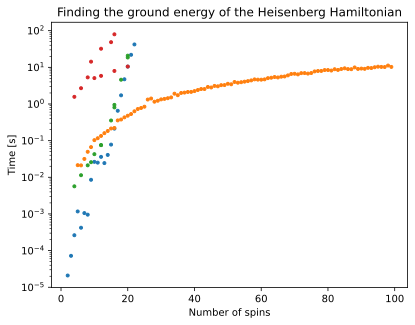

In [132]:
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Number of spins')
plt.ylabel('Time [s]')
plt.title('Finding the ground energy of the Heisenberg Hamiltonian')
plt.plot(ns,ts1D,'.',label='Exact 1D')
plt.plot(nsDMRG,ts1D_DMRG,'.',label='1D MPS DMRG')

plt.plot([nn[0]*nn[1] for nn in n2dTab],ts2D,'.',label='Exact 2D')
plt.plot([nn[0]*nn[1] for nn in n2dTabSimple],ts2Dsimple,'.', label='2D PEPS Simple Update')
#plt.legend()
plt.show()

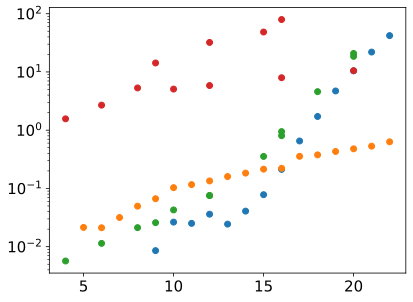

In [130]:
plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('N')
#plt.ylabel('t [s]')
#plt.title('Computational cost of finding ground energy of 1D Heisenberg hamiltonian')

plt.plot(ns[7:],ts1D[7:],'o',label='Exact 1D')
plt.plot(nsDMRG[:18],ts1D_DMRG[:18],'o',label='1D MPS DMRG')

plt.plot([nn[0]*nn[1] for nn in n2dTab],ts2D,'o',label='Exact 2D')
plt.plot([nn[0]*nn[1] for nn in n2dTabSimple],ts2Dsimple,'o', label='2D PEPS Simple Update')
#plt.legend()

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15) 

plt.show()